In [518]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

LacI ---| TetR,

TetR ---| Alpha Cl,

Alpha Cl ---| LacI

In [524]:
repressilator = gs.ReactionModel(
                                species = {
                                                'tetR': 0,
                                                'lacI': 0,
                                                'alphacl': 0,
                                                'GFP': 0,

                                                'tetR_mRNA': 0,
                                                'lacI_mRNA': 0, 
                                                'alphacl_mRNA': 0,
                                                'GFP_mRNA': 0,
                                                
                                                'complex_tetR': 0,
                                                'complex_lacI': 0,
                                                'complex_alphacl': 0,
                                                'complex_GFP': 0,

                                                'promoter_tetR': 1,
                                                'promoter_lacI': 1,
                                                'promoter_alphacl': 1,
                                                'promoter_GFP': 1
                                                },

                                propensities = {
                                                'kc_tetR': 10.02,
                                                'kc_lacI': 10.02,
                                                'kc_alphacl': 10.02,
                                                'kc_GFP': 10.02,

                                                'kd_tetR': np.log(2)/5,
                                                'kd_lacI': np.log(2)/5,
                                                'kd_alphacl': np.log(2)/5,
                                                'kd_GFP': np.log(2)/5,

                                                'ka_c_tetR': 0.95,
                                                'ka_c_lacI': 0.95,
                                                'ka_c_alphacl': 0.95,
                                                'ka_c_GFP': 0.95,

                                                'kd_c_tetR': 0.267,
                                                'kd_c_lacI': 0.267,
                                                'kd_c_alphacl': 0.267,
                                                'kd_c_GFP': 0.267,

                                                'kc_mRNA_tetR': 2,
                                                'kc_mRNA_lacI': 2,
                                                'kc_mRNA_alphacl': 2,
                                                'kc_mRNA_GFP': 2,

                                                'kd_mRNA_tetR': np.log(2)/2.5,
                                                'kd_mRNA_lacI': np.log(2)/2.5,
                                                'kd_mRNA_alphacl': np.log(2)/2.5,
                                                'kd_mRNA_GFP': np.log(2)/2.5
                                                },


                                reactions = {
                                                'PctetR':       ['kc_tetR', 'tetR_mRNA'],
                                                'PclacI':       ['kc_lacI', 'lacI_mRNA'],
                                                'Pcalphacl':    ['kc_alphacl', 'alphacl_mRNA'],
                                                'GFP_cre' :     ['kc_GFP', 'GFP_mRNA'],

                                                'PdtetR':       ['kd_tetR', 'tetR'],
                                                'PdlacI':       ['kd_lacI', 'lacI'],
                                                'Pdalphacl':    ['kd_alphacl', 'alphacl'],                                               
                                                'GFP_des':      ['kd_GFP', 'GFP'],

                                                'Ac_tetR':      ['ka_c_tetR', 'lacI', 'promoter_tetR'],
                                                'Ac_lacI':      ['ka_c_lacI', 'alphacl', 'promoter_lacI'],
                                                'Ac_alphacl':   ['ka_c_alphacl', 'tetR', 'promoter_alphacl'],
                                                'Ac_GFP':       ['ka_c_GFP', 'tetR', 'promoter_GFP'],

                                                'Dc_tetR':      ['kd_c_tetR', 'complex_tetR'],
                                                'Dc_lacI':      ['kd_c_lacI', 'complex_lacI'],
                                                'Dc_alphacl':   ['kd_c_alphacl', 'complex_alphacl'],
                                                'Dc_GFP' :      ['kd_c_GFP', 'complex_GFP'],

                                                'Tr_mRNA_tetR':         ['kc_mRNA_tetR', 'promoter_tetR'],
                                                'Tr_mRNA_lacI':         ['kc_mRNA_lacI', 'promoter_lacI'],
                                                'Tr_mRNA_alphacl':      ['kc_mRNA_alphacl', 'promoter_alphacl'],
                                                'Tr_mRNA_GFP':          ['kc_mRNA_GFP', 'promoter_GFP'],
                
                                                'Dc_mRNA_tetR':         ['kd_mRNA_tetR', 'tetR_mRNA'],
                                                'Dc_mRNA_lacI':         ['kd_mRNA_lacI', 'lacI_mRNA'],
                                                'Dc_mRNA_alphacl':      ['kd_mRNA_alphacl', 'alphacl_mRNA'],
                                                'Dc_mRNA_GFP':          ['kd_mRNA_GFP', 'GFP_mRNA']
                                                },
                                
                                q = {   'PctetR':       {'create': ['tetR']},
                                        'PclacI':       {'create': ['lacI']},
                                        'Pcalphacl':    {'create': ['alphacl']},
                                        'GFP_cre':      {'create': ['GFP']},

                                        'PdtetR':       {'destroy': ['tetR']},
                                        'PdlacI':       {'destroy': ['lacI']},
                                        'Pdalphacl':    {'destroy': ['alphacl']},           
                                        'GFP_des':      {'destroy': ['GFP']},

                                        'Ac_tetR' :     {'create': ['complex_tetR'],    'destroy': ['lacI', 'promoter_tetR']},
                                        'Ac_lacI' :     {'create': ['complex_lacI'],    'destroy': ['alphacl', 'promoter_lacI']},
                                        'Ac_alphacl' :  {'create': ['complex_alphacl'], 'destroy': ['tetR', 'promoter_alphacl']},
                                        'Ac_GFP':       {'create': ['complex_GFP'],     'destroy': ['tetR', 'promoter_GFP']},

                                        'Dc_tetR' :     {'create': ['lacI','promoter_tetR'],   'destroy': ['complex_tetR']},
                                        'Dc_lacI' :     {'create': ['alphacl','promoter_lacI'],'destroy': ['complex_lacI']},
                                        'Dc_alphacl' :  {'create': ['tetR', 'promoter_alphacl'],'destroy': ['complex_alphacl']},
                                        'Dc_GFP' :      {'create': ['tetR', 'promoter_GFP'],    'destroy': ['complex_GFP']},

                                        'Tr_mRNA_tetR' :        {'create': ['tetR_mRNA']},
                                        'Tr_mRNA_lacI' :        {'create': ['lacI_mRNA']},
                                        'Tr_mRNA_alphacl' :     {'create': ['alphacl_mRNA']},
                                        'Tr_mRNA_GFP' :         {'create': ['GFP_mRNA']},

                                        'Dc_mRNA_tetR' :        {'destroy': ['tetR_mRNA']},
                                        'Dc_mRNA_lacI' :        {'destroy': ['lacI_mRNA']},
                                        'Dc_mRNA_alphacl' :     {'destroy': ['alphacl_mRNA']},
                                        'Dc_mRNA_GFP' :         {'destroy': ['GFP_mRNA']}}
                                )

In [525]:
simulation = gs.Gillespie(tmax=1200, sampling_time= 1, reaction_model=repressilator, model_name='repressilator', cells=1)
simulation.simulate()


100%|██████████| 1/1 [00:17<00:00, 17.54s/it]


In [526]:
df = pd.read_csv('repressilator.csv', delimiter='|')

Text(0.5, 0, 'Time (min)')

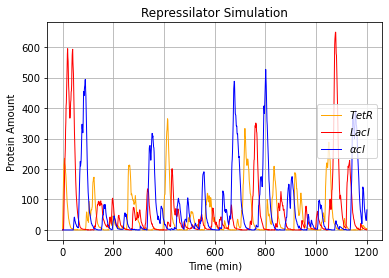

In [527]:
cells = df.cell.unique()
lw = 0.2
alpha_fig = 0.8

plt.plot(df.time[df.cell==1], df.tetR[df.cell==1], '-', color='orange', lw=1, label= r'$TetR$')
plt.plot(df.time[df.cell==1], df.lacI[df.cell==1], '-', color='red', lw=1, label= r'$LacI$')
plt.plot(df.time[df.cell==1], df.alphacl[df.cell==1], '-', color='blue', lw=1, label= r'$\alpha cl$')
plt.grid(True)
plt.legend(loc=7)
plt.title('Repressilator Simulation')
plt.ylabel('Protein Amount')
plt.xlabel('Time (min)')
# plt.yscale('log')
# plt.xlim(0,10)
# plt.ylim(0, 100)

(0.0, 1200.0)

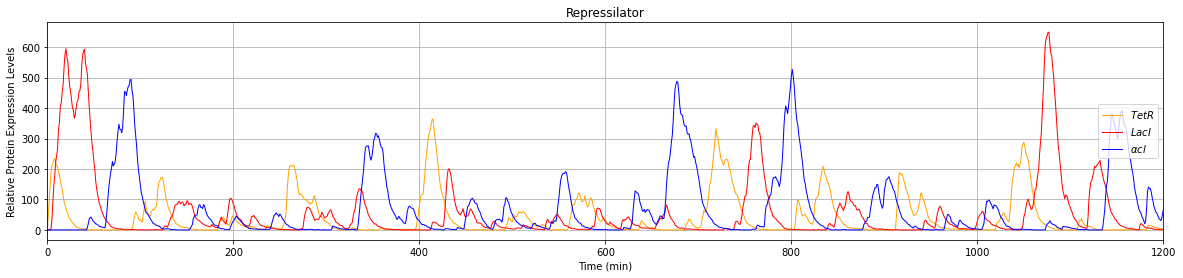

In [529]:
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(df.time[df.cell==1], df.tetR[df.cell==1], '-', color='orange', lw=1, label= r'$TetR$')
ax.plot(df.time[df.cell==1], df.lacI[df.cell==1], '-', color='red', lw=1, label= r'$LacI$')
ax.plot(df.time[df.cell==1], df.alphacl[df.cell==1], '-', color='blue', lw=1, label= r'$\alpha cl$')

fig.set_size_inches(20, 4)

ax.set_title('Repressilator')

ax.set_xlabel('Time (min)')
ax.set_ylabel('Relative Protein Expression Levels')
ax.legend(loc=5)

ax.set_xlim(0,1200)

Text(0, 0.5, 'GFP')

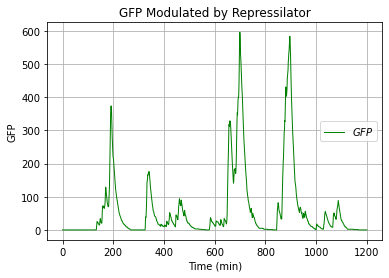

In [501]:
cells = df.cell.unique()
lw = 1
alpha_fig = 0.8
# for cell in cells:
#     plt.plot(df.time[df.cell==cell], df.GFP[df.cell==cell], '-g', lw=lw, alpha=alpha_fig)
plt.grid(True)
plt.plot(df.time[df.cell==1], df.GFP[df.cell==1], '-g', lw=lw, label= r'$GFP$')
plt.legend(loc=5)
plt.title('GFP Modulated by Repressilator')
plt.xlabel('Time (min)')
plt.ylabel('GFP')
# plt.yscale('log')
# plt.xlim([0,500])

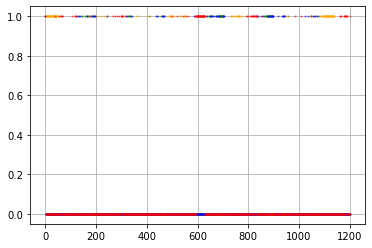

In [502]:
alpha_fig = 0.5
ms = 1
cell = 1
plt.plot(df.time[df.cell==cell], df.promoter_GFP[df.cell==cell], 'o', color='green', ms=ms, alpha=alpha_fig)
plt.plot(df.time[df.cell==cell], df.promoter_tetR[df.cell==cell], 'o', color='orange', ms=ms, alpha=alpha_fig)
plt.plot(df.time[df.cell==cell], df.promoter_alphacl[df.cell==cell], 'o', color='blue', ms=ms, alpha=alpha_fig)
plt.plot(df.time[df.cell==cell], df.promoter_lacI[df.cell==cell], 'o', color='red', ms=ms, alpha=alpha_fig)
plt.grid(True)

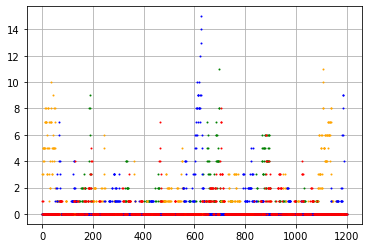

In [503]:
alpha_fig = 1
ms = 1
cell = 1

plt.plot(df.time[df.cell==cell], df.GFP_mRNA[df.cell==cell], 'o', color='green', ms=ms, alpha=alpha_fig)
plt.plot(df.time[df.cell==cell], df.tetR_mRNA[df.cell==cell], 'o', color='orange', ms=ms, alpha=alpha_fig)
plt.plot(df.time[df.cell==cell], df.lacI_mRNA[df.cell==cell], 'o', color='blue', ms=ms, alpha=alpha_fig)
plt.plot(df.time[df.cell==cell], df.alphacl_mRNA[df.cell==cell], 'o', color='red', ms=ms, alpha=alpha_fig)

plt.grid(True)
# plt.xscale('log')

In [697]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

repressilator_division = gs.ReactionModel(
                                species = {
                                                'tetR': 0,
                                                'lacI': 0,
                                                'alphacl': 0,
                                                'GFP': 0
                                                },

                                propensities = {
                                                'kc_tetR': 20 /1.5,
                                                'kc_lacI': 20 /1.5,
                                                'kc_alphacl': 20 /1.5,
                                                'kc_GFP': 20 /1.5,

                                                'kd_tetR': 5 /1.5,
                                                'kd_lacI': 5 /1.5,
                                                'kd_alphacl': 5 /1.5,
                                                'kd_GFP': 5 /1.5,
                                                
                                                'kd_tetR_lacI': 0.2,
                                                'kd_lacI_alphacl': 0.2,
                                                'kd_alphacl_tetR': 0.2,
                                                'kd_GFP_tetR': 0.2
                                                },
                                
                                reactions = {

                                                'pc_tetR':      ['kc_tetR'],
                                                'pc_lacI':      ['kc_lacI'],
                                                'pc_alphacl':   ['kc_alphacl'],
                                                'GFP_cre' :     ['kc_GFP'],
                                                

                                                'PdtetR':       ['kd_tetR'],
                                                'PdlacI':       ['kd_lacI'],
                                                'Pdalphacl':    ['kd_alphacl'],
                                                'GFP_deg':      ['kd_GFP'],
                                                
                                                'tetR_deg_lacI' :       ['kd_tetR_lacI', 'lacI'],
                                                'lacI_deg_alphacl' :    ['kd_lacI_alphacl', 'alphacl'],
                                                'alphacl_deg_tetR' :    ['kd_alphacl_tetR', 'tetR'],
                                                'GFP_deg_tetR':         ['kd_GFP_tetR', 'tetR']
                                                },
                                
                                q = {
                                        'pc_tetR':      {'create' : ['tetR']},
                                        'pc_lacI':      {'create' : ['lacI']},
                                        'pc_alphacl':   {'create' : ['alphacl']},
                                        'GFP_cre':      {'create' : ['GFP']},

                                        'PdtetR':       {'destroy': ['tetR']},
                                        'PdlacI':       {'destroy': ['lacI']},
                                        'Pdalphacl':    {'destroy': ['alphacl']},
                                        'GFP_deg':      {'destroy': ['GFP']},

                                        'tetR_deg_lacI'    : {'destroy': ['tetR']},
                                        'lacI_deg_alphacl' : {'destroy': ['lacI']},
                                        'alphacl_deg_tetR' : {'destroy': ['alphacl']},
                                        'GFP_deg_tetR'     : {'destroy': ['GFP']}
                                        }
                                )
tmax = 270
simulation_2 = gs.Gillespie(tmax=tmax, sampling_time= 1, reaction_model=repressilator_division, model_name='represilator_division', cells=1, division_time=18)

# simulation_2.simulate_division(model='sizer')
simulation_2.simulate()


100%|██████████| 1/1 [00:04<00:00,  4.29s/it]


No handles with labels found to put in legend.


(0.0, 2635.5)

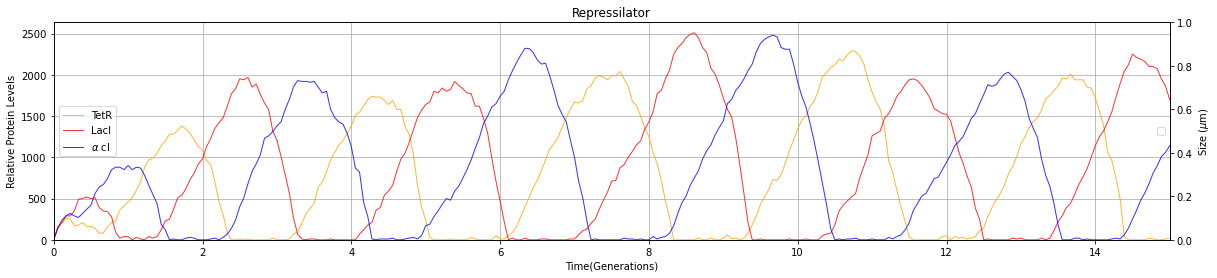

In [698]:
df_2 = pd.read_csv('represilator_division.csv', delimiter='|')

fig1, ax1 = plt.subplots()

ax2 = ax1.twinx()
time = df_2.time/18
ax1.plot(time,df_2.tetR *10,'-', color = 'orange' ,alpha=0.8, linewidth=1, ms=0.5, label='TetR')
ax1.plot(time,df_2.lacI *10,'r-', alpha=0.8, linewidth=1, ms=0.5, label='LacI')
ax1.plot(time,df_2.alphacl *10,'b-', alpha=0.8, linewidth=1, ms=0.5, label=r'${\alpha}$ cl')
# ax2.plot(time,df_2.cell_size, '--',color='black', linewidth=1.5, label='size', alpha=0.25)

fig1.set_size_inches(20, 4)

ax1.set_xlabel('Time(Generations)')
ax2.set_ylabel(r'Size (${\mu}$m)')
ax1.set_ylabel('Relative Protein Levels')
plt.title('Repressilator')
ax1.grid()
plt.legend(loc=5)
ax1.legend(loc=6)
ax1.set_xlim(0, tmax/18)
ax1.set_ylim(0)

No handles with labels found to put in legend.


(0.0, 2467.5)

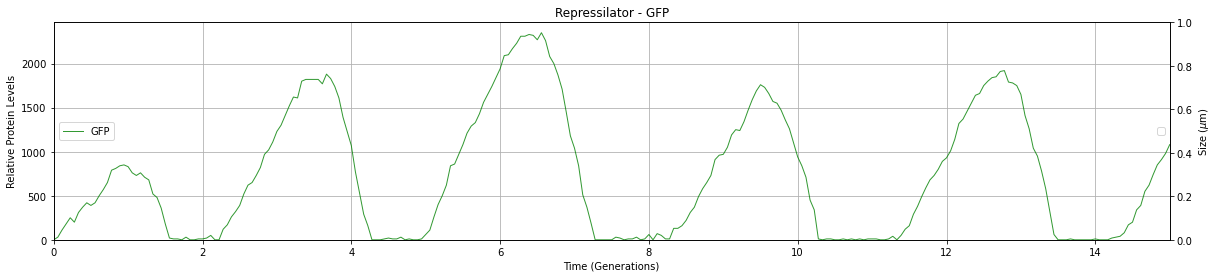

In [699]:
fig2, ax3 = plt.subplots()

ax4 = ax3.twinx()
fig2.set_size_inches(20, 4)

# ax4.plot(time, df_2.cell_size, '--',color='black', linewidth = 1.5, label='size', alpha = 0.25)
ax3.plot(time, df_2.GFP *10,'g-', alpha=0.8, linewidth=1, ms = 0.5, label = 'GFP')


ax4.set_ylabel(r'Size (${\mu}$m)')
ax3.set_ylabel('Relative Protein Levels')
plt.title('Repressilator - GFP')

ax3.set_xlabel('Time (Generations)')

ax3.grid()
plt.legend(loc=5)
ax3.legend(loc=6)
ax3.set_xlim(0, tmax/18)
ax3.set_ylim(0)